# Multiple Linear Regression on Weather prediction

### Get the data

In [1]:
import pandas as pd
from dateutil import parser, rrule
import numpy as np
import getDegrees_Y 
import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)


start_date = "2005-06-01"
end_date = "2012-12-1"

temperatures = pd.read_csv("Chennai_temperature_data.csv")
Y_keys = temperatures.keys()
#print(Y_keys)
planet_data = pd.read_csv("Chennai_PP_data.csv")

dates_string = getDegrees_Y.getDateString(start_date,end_date)
ret = getDegrees_Y.getDegrees_Y(dates_string,temperatures,planet_data,6)
print(len(ret["X"]),len(ret["Y"]))

2741 2741


### Estimate the Regression coefficients (Without Feature Scaling)

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(ret["X"],ret["Y"][:,-1])

print("alpha = ", regressor.intercept_)
print(np.array(regressor.coef_).shape)
pd.DataFrame(np.column_stack((np.array(regressor.coef_),np.array(ret["X_keys"]))))

alpha =  8587498581485.639
(14,)


,0,1
0,0.000610247,Ascendant (As)_Degree
1,-0.00070971,Jupiter (Ju)_Degree
2,6.74041e+10,Ketu (Ke)_Degree
3,0.00125894,Mars (Ma)_Degree
4,-0.00147323,Mercury (Me)_Degree
5,-0.000106388,Moon (Mo)_Degree
6,0.327454,Neptune (Ne)_Degree
7,-6.74041e+10,Rahu (Ra)_Degree
8,0.12118,Saturn (Sa)_Degree
9,-0.00429347,Sun (Su)_Degree


#### Predict the results

In [42]:
test_date = ['12/12/2013','12/12/2004','1/6/2017']
test_ret = getDegrees_Y.getDegrees_Y(test_date,temperatures,planet_data,6)
y_pred = regressor.predict(test_ret["X"])

#print(sc_Y.inverse_transform(y_pred))
print(y_pred)
print(test_ret["Y"][:,2])

[2.520e+01 1.717e+13 1.717e+13]
['26.0' '26.0' '33.0']


### Estimate the Regression coefficients (With Feature Scaling)

In [2]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_tr = sc_X.fit_transform(ret["X"])

sc_Y = StandardScaler()
y_tr = sc_Y.fit_transform(ret["Y"][:,-1].reshape(-1,1))

X_tr.shape
y_tr.shape

/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype <U21 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(2741, 1)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#y = ret["Y"][:,-1]

regressor.fit(X_tr,y_tr)

print("alpha = ", regressor.intercept_)
pd.DataFrame(np.column_stack((np.array(regressor.coef_)[0],np.array(ret["X_keys"]))))

alpha =  [-0.]


,0,1
0,0.0202041,Ascendant (As)_Degree
1,-0.0268952,Jupiter (Ju)_Degree
2,2.30719,Ketu (Ke)_Degree
3,0.0424167,Mars (Ma)_Degree
4,-0.0514526,Mercury (Me)_Degree
5,-0.00395519,Moon (Mo)_Degree
6,0.564848,Neptune (Ne)_Degree
7,2.30719,Rahu (Ra)_Degree
8,1.15547,Saturn (Sa)_Degree
9,-0.152837,Sun (Su)_Degree


#### Predict

In [17]:
test_date = ['12/12/2013','12/12/2012','1/6/2017']
test_ret = getDegrees_Y.getDegrees_Y(test_date,temperatures,planet_data,6)
X_test = sc_X.transform(test_ret["X"])
y_pred = regressor.predict(X_test)

print(sc_Y.inverse_transform(y_pred))
print(test_ret["Y"][:,2])

[[  25.213]
 [  25.78 ]
 [-258.824]]
['26.0' '26.0' '33.0']


/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Drop low frequency planets

In [32]:
pd.DataFrame(ret["X_keys"].tolist())

,0
0,Ascendant (As)_Degree
1,Jupiter (Ju)_Degree
2,Ketu (Ke)_Degree
3,Mars (Ma)_Degree
4,Mercury (Me)_Degree
5,Moon (Mo)_Degree
6,Neptune (Ne)_Degree
7,Rahu (Ra)_Degree
8,Saturn (Sa)_Degree
9,Sun (Su)_Degree


In [33]:
pd.DataFrame(ret["X"][:,[3,4,5,9,13]]) #Keep mars,mercury,moon,sun,venus

,0,1,2,3,4
0,328.45,44.31,339.65,46.93,63.17
1,329.15,46.5,353.02,47.89,64.39
2,329.86,48.7,6.16,48.84,65.61
3,330.57,50.91,19.08,49.8,66.84
4,331.27,53.11,31.81,50.76,68.06
5,331.98,55.3,44.36,51.72,69.28
6,332.68,57.48,56.74,52.67,70.5
7,333.38,59.65,68.96,53.63,71.72
8,334.08,61.79,81.04,54.59,72.95
9,334.78,63.92,93.01,55.54,74.17


In [34]:
X_d = ret["X"][:,[3,4,5,9,13]]

### Estimate and predict

In [35]:
##Feature Scaling

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_tr = sc_X.fit_transform(X_d)
sc_Y = StandardScaler()
y_tr = sc_Y.fit_transform(ret["Y"][:,-1].reshape(-1,1))

##Fit Regression model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#y = ret["Y"][:,-1]

regressor.fit(X_tr,y_tr)

print("alpha = ", regressor.intercept_)
pd.DataFrame(np.column_stack((np.array(regressor.coef_)[0],np.array(ret["X_keys"][[3,4,5,9,13]]))))

alpha =  [0.]


/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype <U21 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,0,1
0,0.0780975,Mars (Ma)_Degree
1,-0.134193,Mercury (Me)_Degree
2,-0.00868853,Moon (Mo)_Degree
3,-0.426223,Sun (Su)_Degree
4,-0.236941,Venus (Ve)_Degree


#### Predict

In [37]:
test_date = ['12/12/2013','12/12/2012','1/6/2017','3/5/2004']
test_ret = getDegrees_Y.getDegrees_Y(test_date,temperatures,planet_data,6)
X_td = test_ret["X"][:,[3,4,5,9,13]]
X_test = sc_X.transform(X_td)
y_pred = regressor.predict(X_test)

print(sc_Y.inverse_transform(y_pred))
print(test_ret["Y"][:,2])

[[27.334]
 [28.058]
 [32.003]
 [30.666]]
['26.0' '26.0' '33.0' '28.0']


/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Visualize

In [40]:
start_date = "2013-01-01"
end_date = "2016-12-1"
dates_string = getDegrees_Y.getDateString(start_date,end_date)
ret1 = getDegrees_Y.getDegrees_Y(dates_string,temperatures,planet_data,6)
print(len(ret1["X"]),len(ret1["Y"]))

1431 1431


/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


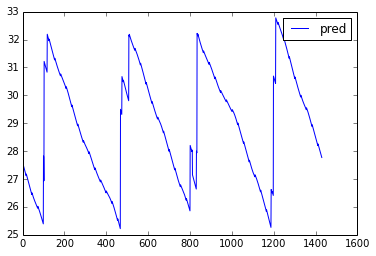

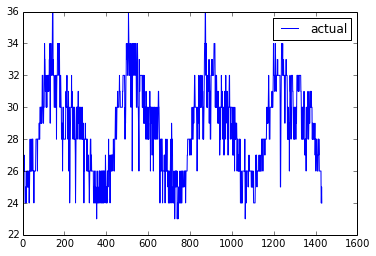

In [46]:
X_td = ret1["X"][:,[3,4,5,9,13]]
X_test = sc_X.transform(X_td)
y_pred = regressor.predict(X_test)
%matplotlib inline 
#Needed to inline graphs
import matplotlib.pyplot as plt

plt.plot(sc_Y.inverse_transform(y_pred),label="pred")
plt.legend()
plt.show()
plt.plot(ret1["Y"][:,-1],label="actual")
plt.legend()
plt.show()

### Consolidated code

Training data : 1645 1645
alpha =  [32.33416676]
             0                    1
0  0.000255076     Mars (Ma)_Degree
1  0.000457994  Mercury (Me)_Degree
2  0.000124557     Moon (Mo)_Degree
3   -0.0135527      Sun (Su)_Degree
4  -0.00797295    Venus (Ve)_Degree
Test data  1066 1066


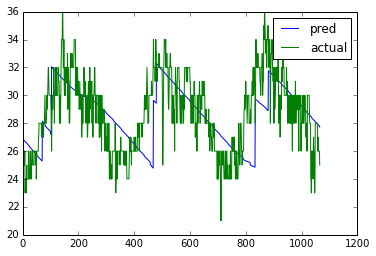

In [7]:
import pandas as pd
from dateutil import parser, rrule
import numpy as np
import getDegrees_Y 
import numpy as np


def train(temperatures,planet_data,start_date,end_date,x_index,y_index,fs):

    dates_string = getDegrees_Y.getDateString(start_date,end_date)
    ret = getDegrees_Y.getDegrees_Y(dates_string,temperatures,planet_data,y_index)
    print("Training data :", len(ret["X"]),len(ret["Y"]))

    #Keep mars,mercury,moon,sun,venus
    X_d = ret["X"][:,x_index]

    ##Feature Scaling
    from sklearn.preprocessing import StandardScaler

    if fs:
       sc_X = StandardScaler()
       X_tr = sc_X.fit_transform(X_d)
       sc_Y = StandardScaler()
       y_tr = sc_Y.fit_transform(ret["Y"][:,-1].reshape(-1,1))
    else:
        X_tr = X_d
        y_tr = ret["Y"][:,-1].reshape(-1,1)
        sc_X = None
        sc_Y = None
    
    #train
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_tr,y_tr)
    
    #Print coeff
    print("alpha = ", regressor.intercept_)
    print(pd.DataFrame(np.column_stack((np.array(regressor.coef_)[0],np.array(ret["X_keys"][x_index])))))
    
    return {"reg":regressor,"X_tr":sc_X,"y_tr":sc_Y}

def train_test(indep_var_idx,dep_var_idx,feature_scaling,tr_start,tr_end,test_start,test_end):

   temperatures = pd.read_csv("Chennai_temperature_data.csv")
   planet_data = pd.read_csv("Chennai_PP_data.csv")
    
   ##Training
   reg = train(temperatures,planet_data,tr_start,tr_end,indep_var_idx,dep_var_idx,feature_scaling)

   ##Testing
   dates_string = getDegrees_Y.getDateString(test_start,test_end)
   ret1 = getDegrees_Y.getDegrees_Y(dates_string,temperatures,planet_data,dep_var_idx)
   print("Test data ", len(ret1["X"]),len(ret1["Y"]))

   X_td = ret1["X"][:,indep_var_idx]

   if feature_scaling:
      X_test = reg["X_tr"].transform(X_td)
   else:
      X_test = X_td

   y_pred = reg["reg"].predict(X_test)

   ##Visualize
   %matplotlib inline 
   #Needed to inline graphs
   import matplotlib.pyplot as plt

   if feature_scaling:
      plt.plot(reg["y_tr"].inverse_transform(y_pred),label="pred")
   else:
      plt.plot(y_pred,label="pred")

   plt.plot(ret1["Y"][:,-1],label="actual")
   plt.legend()
   
   return plt

if __name__ == "__main__":

   indep_var_idx = [3,4,5,9,13]
   dep_var_idx = 6
   feature_scaling = False

   tr_start = "2010-06-01"
   tr_end = "2014-12-1"

   test_start = "2015-01-01"
   test_end = "2017-12-1"

   plt = train_test(indep_var_idx,dep_var_idx,feature_scaling,tr_start,tr_end,test_start,test_end)
   plt.show()

## Analysis

Comparing with sun is similar to time series

Training data : 1645 1645
alpha =  [28.7513249]
             0                 1
0 -8.83835e-05  Moon (Mo)_Degree
Test data  1066 1066


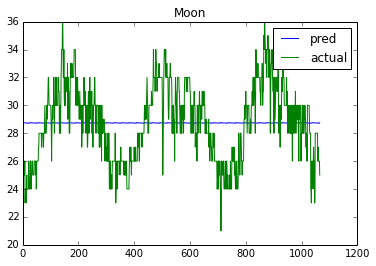

In [11]:
import pandas as pd
from dateutil import parser, rrule
import numpy as np
import getDegrees_Y 
import numpy as np
import MLR
%matplotlib inline 
#Needed to inline graphs

tr_start = "2010-06-01"
tr_end = "2014-12-1"

test_start = "2015-01-01"
test_end = "2017-12-1"

##MOON
indep_var_idx = [5]
dep_var_idx = 6
feature_scaling = False

plt = MLR.train_test(indep_var_idx,dep_var_idx,feature_scaling,tr_start,tr_end,test_start,test_end)
plt.title("Moon")
plt.show()


Training data : 1645 1645
alpha =  [31.42322694]
          0                    1
0 -0.014288  Mercury (Me)_Degree
Test data  1066 1066


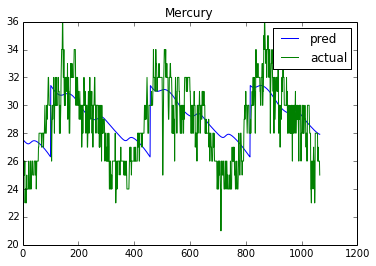

In [5]:
##Mercury
indep_var_idx = [4]
dep_var_idx = 6
feature_scaling = False

plt = MLR.train_test(indep_var_idx,dep_var_idx,feature_scaling,tr_start,tr_end,test_start,test_end)
plt.title("Mercury")
plt.show()

Training data : 1645 1645
alpha =  [31.51631279]
           0                  1
0 -0.0158129  Venus (Ve)_Degree
Test data  1066 1066


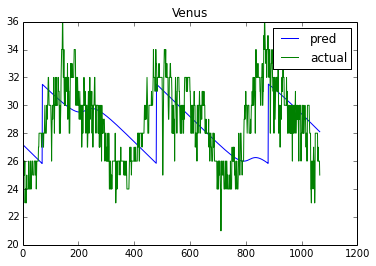

In [6]:
##Venus
indep_var_idx = [13]
dep_var_idx = 6
feature_scaling = False

plt = MLR.train_test(indep_var_idx,dep_var_idx,feature_scaling,tr_start,tr_end,test_start,test_end)
plt.title("Venus")
plt.show()

Training data : 1645 1645
alpha =  [31.11373998]
           0                 1
0 -0.0137311  Mars (Ma)_Degree
Test data  1066 1066


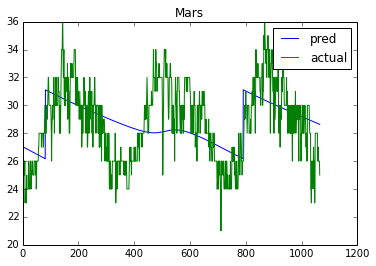

In [7]:
##Mars
indep_var_idx = [3]
dep_var_idx = 6
feature_scaling = False

plt = MLR.train_test(indep_var_idx,dep_var_idx,feature_scaling,tr_start,tr_end,test_start,test_end)
plt.title("Mars")
plt.show()

Training data : 1645 1645
alpha =  [31.80876279]
           0                1
0 -0.0177305  Sun (Su)_Degree
Test data  1066 1066


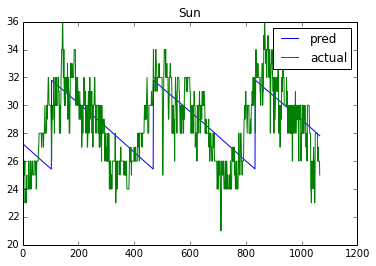

In [8]:
##Sun
indep_var_idx = [9]
dep_var_idx = 6
feature_scaling = False

plt = MLR.train_test(indep_var_idx,dep_var_idx,feature_scaling,tr_start,tr_end,test_start,test_end)
plt.title("Sun")
plt.show()

Training data : 1645 1645
alpha =  [32.35585592]
             0                    1
0  0.000262892     Mars (Ma)_Degree
1  0.000446746  Mercury (Me)_Degree
2   -0.0135532      Sun (Su)_Degree
3  -0.00796513    Venus (Ve)_Degree
Test data  1066 1066


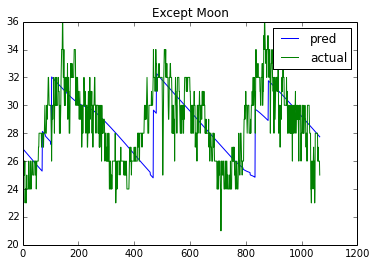

In [9]:
##Except moon
indep_var_idx = [3,4,9,13]
dep_var_idx = 6
feature_scaling = False

plt = MLR.train_test(indep_var_idx,dep_var_idx,feature_scaling,tr_start,tr_end,test_start,test_end)
plt.title("Except Moon")
plt.show()